# <font color=brown>A. INTRODUÇÃO</font>
<img src='imagem11.jpg' alt='Logo' style='width:200px;'/>
<img src='imagem.png' alt='Logo' style='width:20000000px;'/>

# <font color=brown>B. PROCEDIMENTOS METODOLÓGICOS</font>
# <font color=blue>1. Coleta dos Dados com Google Analytics</font>
### <font color=red>Utilizou-se o Inquérito por Questionário e uma metodologia mais quantitativa para recolher e avaliar os dados, respetivamente</font>

# <font color=blue>2. Limpeza e Transformação com Python - Data Wrangling/Munging</font>

In [1]:
# Faz o upgrade do Pyhton Package Index
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\simao\anaconda3\lib\site-packages (19.1.1)


In [2]:
## Importando os pacotes de análise de dados - PYTHON OPEN DATA SCIENCE STACK
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Pacotes de complemento ao matplotlib.pyplot 
from pylab import *
import seaborn as sns

# Importando os módulos Tweepy, Datetime e Json
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime
import json

In [3]:
# Lendo o Microsoft Excel em formato Comma Separated Values (.csv) com as respostas do questionário
# e importando para o formato tabular do pacote Pandas
df = pd.read_csv("Questionario.csv")
df.head()

,Carimbo de data/hora,Pontuação total,1.1 - Idade,1.1 - Idade [Pontuação],1.1 - Idade [Feedback],1.2 - Sexo,1.2 - Sexo [Pontuação],1.2 - Sexo [Feedback],1.3 - Habilitações Académicas,1.3 - Habilitações Académicas [Pontuação],...,3 - Recomendaria este questionário a alguém?,3 - Recomendaria este questionário a alguém? [Pontuação],3 - Recomendaria este questionário a alguém? [Feedback],4 - Terá mais atenção agora quando for ler uma notícia?,4 - Terá mais atenção agora quando for ler uma notícia? [Pontuação],4 - Terá mais atenção agora quando for ler uma notícia? [Feedback],Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,2019/04/18 3:23:12 PM GMT+1,69.00 / 100,< 18,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,4.0,3.0,1.0,2.0
1,2019/04/18 4:16:38 PM GMT+1,58.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,2.0,4.0,3.0
2,2019/04/18 4:24:54 PM GMT+1,63.00 / 100,18-25,-- / 0,NaN,Feminino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,5.0,4.0,1.0,2.0
3,2019/04/18 11:25:06 PM GMT+1,64.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Licenciatura,-- / 0,...,Sim,-- / 0,NaN,Sim,1.00 / 1,NaN,NaN,NaN,NaN,NaN
4,2019/04/24 12:47:30 AM GMT+1,57.00 / 100,18-25,-- / 0,NaN,Masculino,-- / 0,NaN,Ensino Secundário,-- / 0,...,Não,-- / 0,NaN,Não,0.00 / 1,NaN,NaN,NaN,NaN,NaN


In [4]:
# Organizando os dados para uma melhor análise, excluíndo aqueles que não foram considerados relevantes
## Eliminando colunas desnecessárias
for x in df:
    if ("[Pontuação]" in x):
        df = df.drop(x, 1)
    elif ("[Feedback]" in x):
        df = df.drop(x, 1)
    elif ("Unnamed" in x):
        df = df.drop(x, axis=1)
    elif ("Carimbo de data/hora" == x):
        df = df.drop(x, axis=1)
        
## Eliminando linhas de teste
for y in range(0, 4):
    df = df.drop(y)
df = df.drop(7)

## Renomeando linhas
df.index = list(range(1,201))
df

,Pontuação total,1.1 - Idade,1.2 - Sexo,1.3 - Habilitações Académicas,1.4 - Curso a frequentar,2.1 - Tem acesso à Internet em casa?,2.2 - Costuma utilizar a Internet noutro lugar?,2.3 - Qual é o meio que mais utiliza para estar a par das notícias?,"2.4 - Sabe o que significa ""Fake News""?","2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?",...,"2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?",2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Fiabilidade],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Relevância],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Atualização],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Completa],2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação [Explicita],1 - Achou este questionário útil?,"2 - Achou o preenchimento deste questionário acessível em termos de clareza, precisão e tempo?",3 - Recomendaria este questionário a alguém?,4 - Terá mais atenção agora quando for ler uma notícia?
1,57.00 / 100,18-25,Masculino,Ensino Secundário,MIEIC,Sim,Sim,Redes Sociais,Sim,“Fake News” são informações fabricadas que imi...,...,Frequentemente,4º,5º,3º,1º,2º,Não,Não,Não,Não
2,75.00 / 100,18-25,Masculino,Mestrado,MIEEC,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Raramente,5º,2º,1º,3º,4º,Sim,Sim,Sim,Sim
3,80.00 / 100,18-25,Masculino,Licenciatura,Mestrado em Multimedia,Sim,Sim,Jornais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,2º,4º,3º,5º,Sim,Sim,Sim,Sim
4,77.00 / 100,18-25,Masculino,Ensino Secundário,Mestrado Integrado em Bioengenharia,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,5º,4º,2º,3º,Sim,Sim,Não,Sim
5,38.00 / 100,18-25,Masculino,Mestrado,Mestrado em Engenharia Civil,Sim,Sim,Televisão,Sim,“Fake News” são informações fabricadas que imi...,...,Raramente,5º,3º,4º,1º,2º,Sim,Sim,Sim,Sim
6,84.00 / 100,18-25,Feminino,Ensino Secundário,Mestrado Integrado em Engenharia Mecânica,Sim,Sim,Televisão,Sim,"""Fake News"" são informações fabricadas proposi...",...,Às vezes,3º,1º,2º,5º,4º,Não,Sim,Sim,Não
7,78.00 / 100,18-25,Feminino,Ensino Secundário,MIEEC,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,5º,4º,3º,2º,1º,Sim,Não,Não,Sim
8,80.00 / 100,18-25,Masculino,Licenciatura,Informatica,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,5º,1º,3º,4º,2º,Não,Não,Não,Não
9,77.00 / 100,18-25,Masculino,Ensino Secundário,mieec,Sim,Sim,Redes Sociais,Sim,"""Fake News"" são informações fabricadas proposi...",...,Nunca,1º,5º,2º,3º,4º,Sim,Sim,Sim,Sim
10,63.00 / 100,41-65,Feminino,Doutoramento,UC Acústica Ambiental MIEA,Sim,Sim,Redes Sociais,Sim,“Fake News” são informações fabricadas que imi...,...,Às vezes,1º,5º,2º,3º,4º,Sim,Sim,Sim,Sim


# <font color=brown>C. APRESENTAÇÃO E DISCUSSÃO DOS RESULTADOS</font>
# <font color=blue>1. Visualização dos Dados - Pergunta 1.1 a 2.10</font>
## <font color=green>Identificar grupos sociais</font>

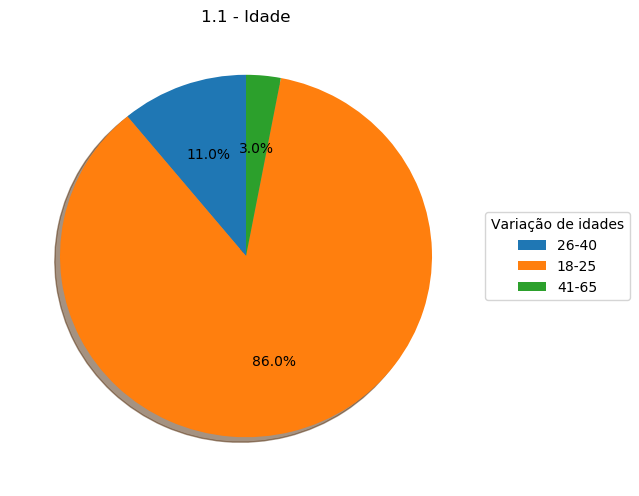

[('26-40', 22), ('18-25', 172), ('41-65', 6)]

In [5]:
# Pergunta 1.1
## Calcular as categorias e suas frequências
idades = ["26-40","18-25", "41-65"]
frequencia = []
for x in idades:
    mask = df["1.1 - Idade"] == x
    df1 = df[mask]
    df2 = df1["1.1 - Idade"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 1.1 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.1 - Idade")
plt.legend(idades, title="Variação de idades", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
resultado = list(zip(idades, frequencia))
resultado

### <font color=red>Note-se que não existem as restantes categorias, pelo que a sua frequência é 0</font>

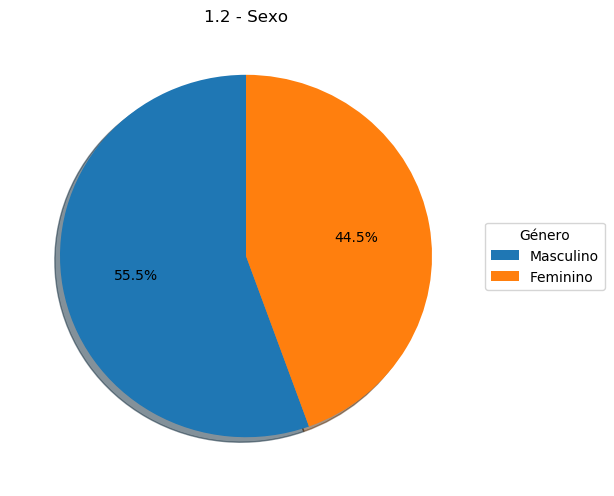

[('Masculino', 111), ('Feminino', 89)]

In [6]:
# Pergunta 1.2
## Calcular as categorias e suas frequências
genero = ["Masculino","Feminino"]
frequencia = []
for x in genero:
    mask = df["1.2 - Sexo"] == x
    df1 = df[mask]
    df2 = df1["1.2 - Sexo"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 1.2 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.2 - Sexo")
plt.legend(genero, title="Género", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
resultado = list(zip(genero, frequencia))
resultado

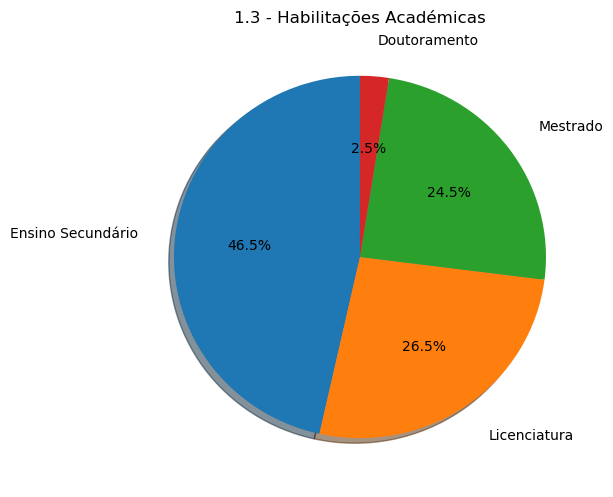

[('Ensino Secundário', 93),
 ('Licenciatura', 53),
 ('Mestrado', 49),
 ('Doutoramento', 5)]

In [7]:
# Pergunta 1.3
## Calcular as categorias e suas frequências
habilitacoes = ["Ensino Secundário", "Licenciatura", "Mestrado", "Doutoramento"]
frequencia = []
for x in habilitacoes:
    mask = df["1.3 - Habilitações Académicas"] == x
    df1 = df[mask]
    df2 = df1["1.3 - Habilitações Académicas"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 1.3 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, labels = habilitacoes, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("1.3 - Habilitações Académicas")
plt.show()
resultado = list(zip(habilitacoes, frequencia))
resultado

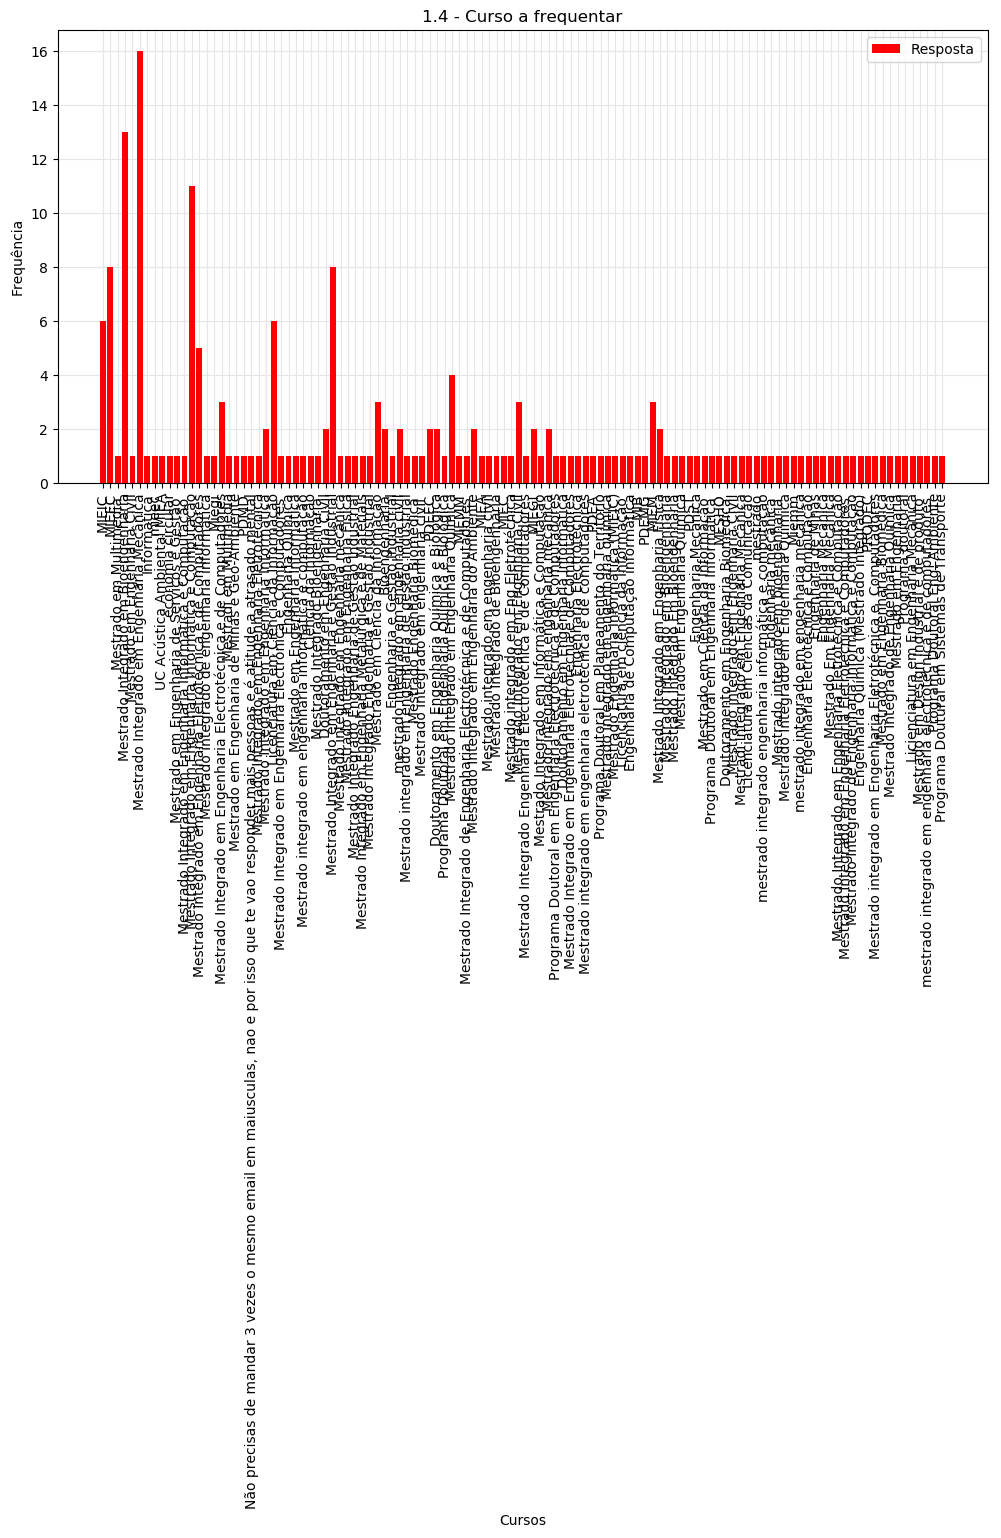

[('MIEIC', 6),
 ('MIEEC', 8),
 ('Mestrado em Multimedia ', 1),
 ('Mestrado Integrado em Bioengenharia', 13),
 ('Mestrado em Engenharia Civil', 1),
 ('Mestrado Integrado em Engenharia Mecânica', 16),
 ('Informatica', 1),
 ('mieec', 1),
 ('UC Acústica Ambiental MIEA', 1),
 ('economia circular', 1),
 ('Mestrado em Engenharia de Serviços e Gestão ', 1),
 ('Mestrado Integrado em Engenharia Informática e Computação ', 1),
 ('Mestrado Integrado em Engenharia Informática e Computação', 11),
 ('Mestrado Integrado em Engenharia Eletrotécnica e de Computadores', 5),
 ('Mestrado integrado de engenharia informática', 1),
 ('Miegi', 1),
 ('Mestrado Integrado em Engenharia Electrotécnica e de Computadores', 3),
 ('Mestradi em Multimédia', 1),
 ('Mestrado em Engenharia de Minas e Geo-Ambiente', 1),
 ('PDMD', 1),
 ('Não precisas de mandar 3 vezes o mesmo email em maiusculas, nao e por isso que te vao responder mais pessoas e é atitude a atrasado mental',
  1),
 ('Mestrado Integrado em Engenharia Eletro

In [8]:
# Pergunta 1.4
## 1º Round
### Calcular todas as categorias (considerando todas as possibilidades para um curso) e suas frequências
frequencia = []
curso = []
for x in df["1.4 - Curso a frequentar"]:
    if (x not in curso):
        curso.append(x)
        mask = df["1.4 - Curso a frequentar"] == x
        df1 = df[mask]
        df2 = df1["1.4 - Curso a frequentar"]
        df3 = df2.count()
        frequencia.append(df3)
    else:
        pass

### Visualizar a pergunta 1.4 num gráfico de barras com todas as categorias e frequências
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.90')
plt.bar(curso, frequencia, zorder = 100, color="r", label="Resposta")
plt.xlabel("Cursos")
plt.title("1.4 - Curso a frequentar")
plt.ylabel("Frequência")
plt.xticks(rotation=90)
plt.legend()
plt.show()
resultado = list(zip(curso, frequencia))
resultado

## <font color=red>Note-se que são demasiados cursos, sendo que muitos deles foram escritos com letras maiúsculas/minúsculas ou com siglas</font>
### <font color=blue>Filtrar-se-á cada curso único somente uma vez</font>
Procedimentos:
    1. Filtrar os cursos por letra maiúscula, solucionando o problema dos cursos com letras maiúsculas/minúsculas
    2. Somar as siglas aos respetivos cursos

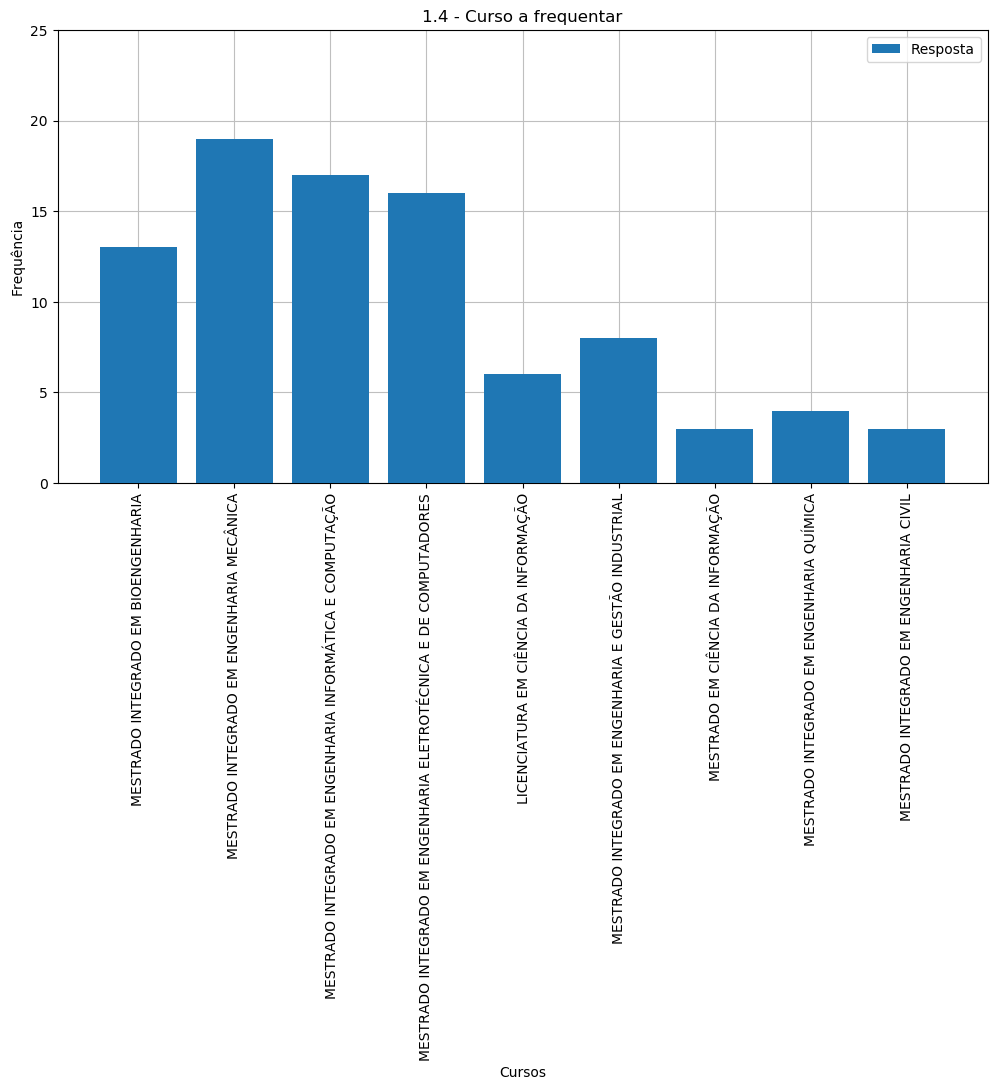

[('MESTRADO INTEGRADO EM BIOENGENHARIA', 13),
 ('MESTRADO INTEGRADO EM ENGENHARIA MECÂNICA', 19),
 ('MESTRADO INTEGRADO EM ENGENHARIA INFORMÁTICA E COMPUTAÇÃO', 17),
 ('MESTRADO INTEGRADO EM ENGENHARIA ELETROTÉCNICA E DE COMPUTADORES', 16),
 ('LICENCIATURA EM CIÊNCIA DA INFORMAÇÃO', 6),
 ('MESTRADO INTEGRADO EM ENGENHARIA E GESTÃO INDUSTRIAL', 8),
 ('MESTRADO EM CIÊNCIA DA INFORMAÇÃO', 3),
 ('MESTRADO INTEGRADO EM ENGENHARIA QUÍMICA', 4),
 ('MESTRADO INTEGRADO EM ENGENHARIA CIVIL', 3)]

In [9]:
# Pergunta 1.4
## 2º Round
### Calcular todas as categorias únicas e com frequências superiores a 2
frequencia = []
curso = []
for x in df["1.4 - Curso a frequentar"]:
    #### Filtrar os cursos por letra maiúscula, solucionando o problema dos cursos com letras maiúsculas/minúsculas
    y = x.upper()
    if (y not in curso):
        mask = df["1.4 - Curso a frequentar"] == x
        df1 = df[mask]
        df2 = df1["1.4 - Curso a frequentar"]
        df3 = df2.count()
        if (df3 > 2): 
            frequencia.append(df3)
            curso.append(y)
        else:
            pass
    else:
        pass
    
#### Somar as siglas aos respetivos cursos
MIEIC, MIEEC, MIEEC1, MIEM = np.array(frequencia[0]), np.array(frequencia[1]), np.array(frequencia[6]), np.array(frequencia[-1])
array = np.array(frequencia)
array[4] += MIEIC; array[5] += MIEEC; array[5] += MIEEC1; array[3] += MIEM
frequencia = list(array)
del(frequencia[0], frequencia[0], frequencia[4], frequencia[-1]); del(curso[0], curso[0], curso[4], curso[-1])
curso, frequencia

### Visualizar a pergunta 1.4 num gráfico de barras dos cursos únicos e com frequências superiores a 2
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.75')
plt.bar(curso, frequencia, zorder = 100, label="Resposta")
plt.xlabel("Cursos")
plt.ylabel("Frequência")
plt.xticks(rotation=90)
plt.ylim(0, 25)
plt.title("1.4 - Curso a frequentar")
plt.legend()
plt.show()
resultado = list(zip(curso, frequencia))
resultado

## <font color=green>Conhecimento e Comportamento dos estudantes da FEUP</font>

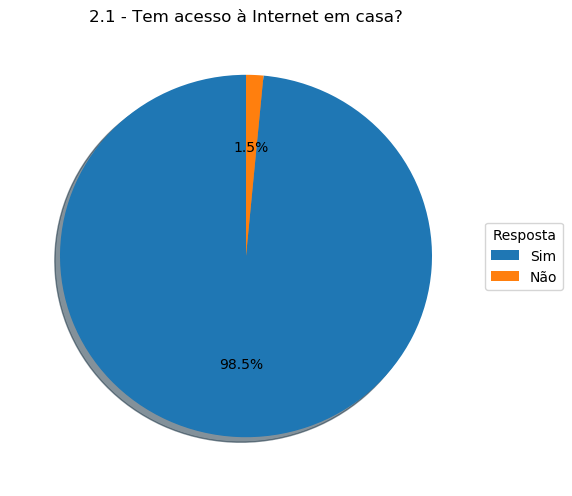

[('Sim', 197), ('Não', 3)]

In [10]:
# Pergunta 2.1
## Calcular as categorias e suas frequências
acesso = ["Sim", "Não"]
frequencia = []
for x in acesso:
    mask = df["2.1 - Tem acesso à Internet em casa?"] == x
    df1 = df[mask]
    df2 = df1["2.1 - Tem acesso à Internet em casa?"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 2.1 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.1 - Tem acesso à Internet em casa?")
plt.legend(acesso, title="Resposta", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
resultado = list(zip(acesso, frequencia))
resultado

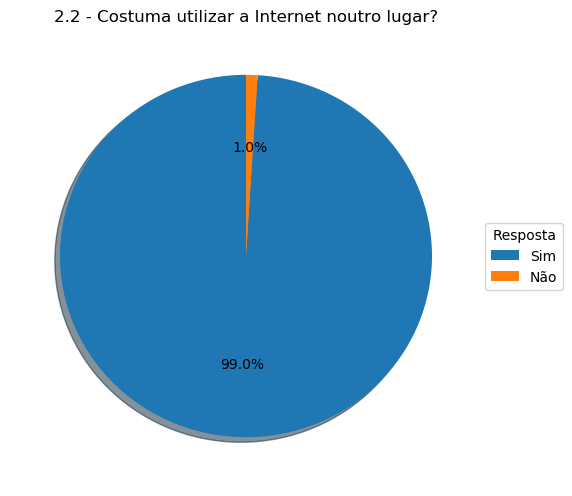

[('Sim', 198), ('Não', 2)]

In [11]:
# Pergunta 2.2
## Calcular as categorias e suas frequências
utilizacao = ["Sim", "Não"]
frequencia = []
for x in utilizacao:
    mask = df["2.2 - Costuma utilizar a Internet noutro lugar?"] == x
    df1 = df[mask]
    df2 = df1["2.2 - Costuma utilizar a Internet noutro lugar?"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 2.2 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.2 - Costuma utilizar a Internet noutro lugar?")
plt.legend(utilizacao, title="Resposta", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
resultado = list(zip(utilizacao, frequencia))
resultado

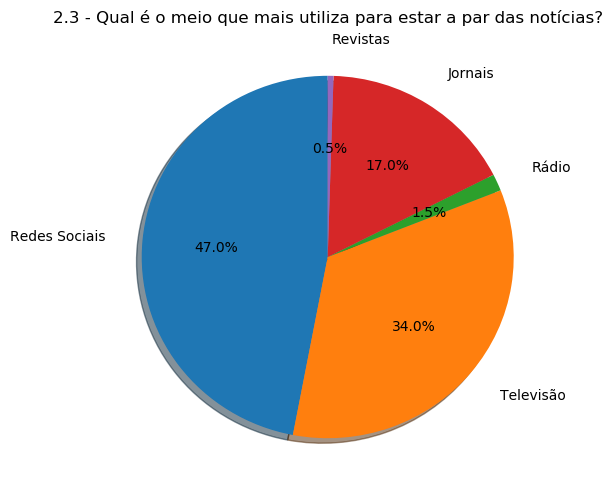

[('Redes Sociais', 94),
 ('Televisão', 68),
 ('Rádio', 3),
 ('Jornais', 34),
 ('Revistas', 1)]

In [12]:
# Pergunta 2.3
## Calcular as categorias e suas frequências
meio = ["Redes Sociais", "Televisão", "Rádio", "Jornais", "Revistas"]
frequencia = []
for x in meio:
    mask = df["2.3 - Qual é o meio que mais utiliza para estar a par das notícias?"] == x
    df1 = df[mask]
    df2 = df1["2.3 - Qual é o meio que mais utiliza para estar a par das notícias?"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 2.3 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, labels = meio, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title("2.3 - Qual é o meio que mais utiliza para estar a par das notícias?")
plt.show()
resultado = list(zip(meio, frequencia))
resultado

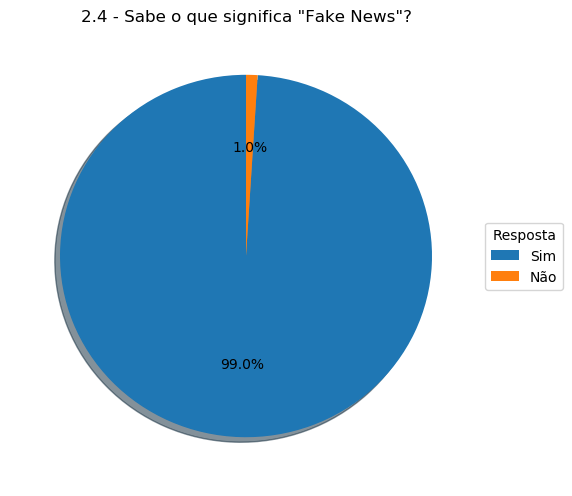

[('Sim', 198), ('Não', 2)]

In [13]:
# Pergunta 2.4 (Pontuada)
## Calcular as categorias e suas frequências
conhecimento = ["Sim", "Não"]
frequencia = []
for x in conhecimento:
    mask = df['2.4 - Sabe o que significa "Fake News"?'] == x
    df1 = df[mask]
    df2 = df1['2.4 - Sabe o que significa "Fake News"?']
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 2.4 num gráfico circular
plt.figure(figsize = (6, 6), dpi = 100)
plt.pie(frequencia, startangle = 90, shadow = True, labeldistance=1.2, autopct="%1.1f%%")
plt.title('2.4 - Sabe o que significa "Fake News"?')
plt.legend(conhecimento, title="Resposta", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
resultado = list(zip(conhecimento, frequencia))
resultado

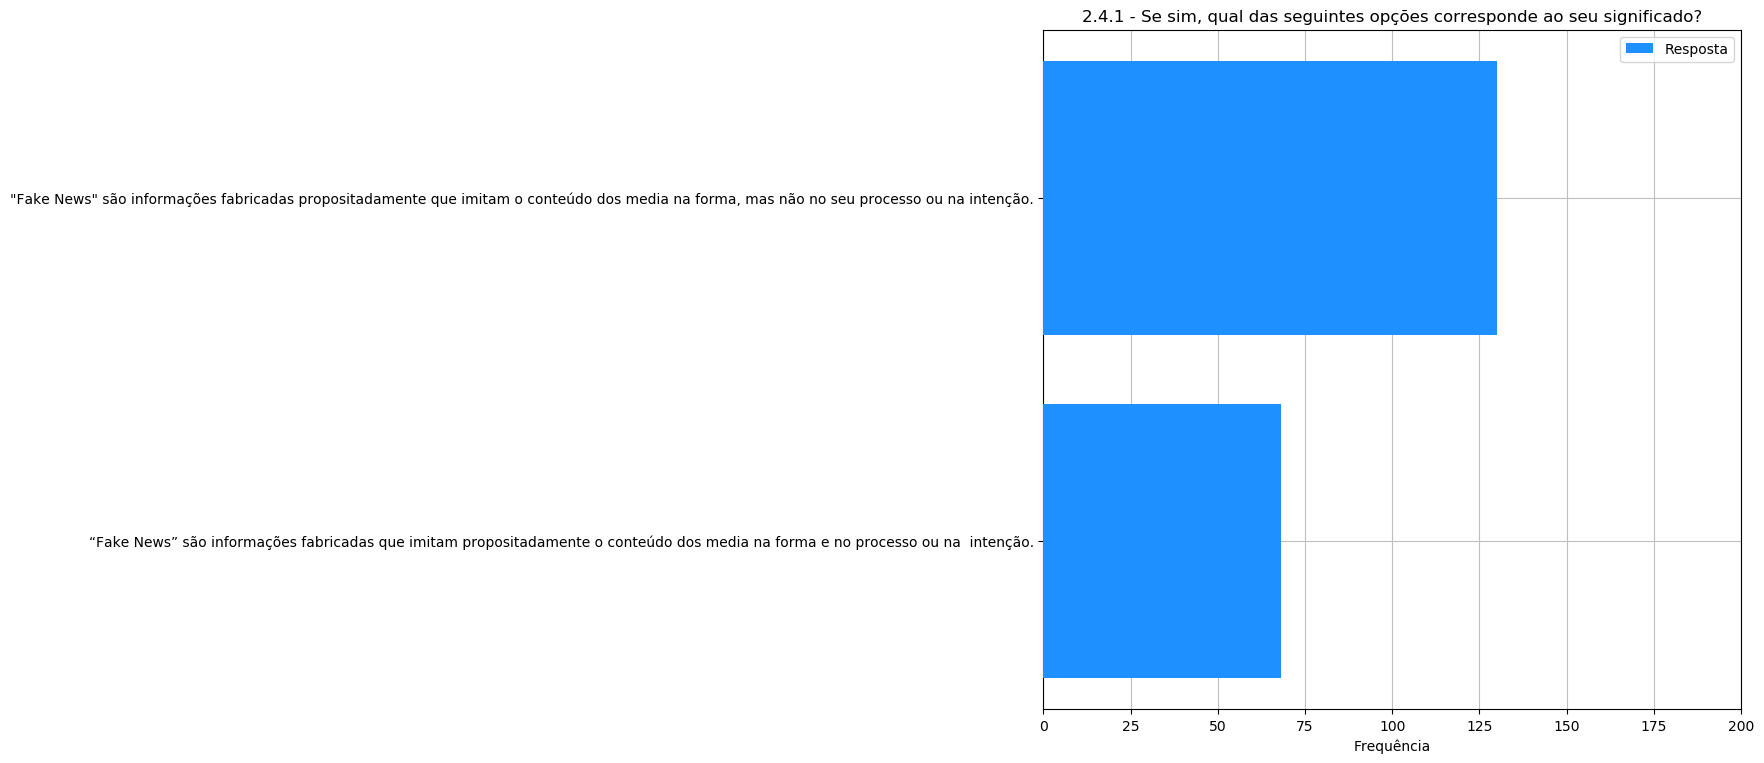

[('“Fake News” são informações fabricadas que imitam propositadamente o conteúdo dos media na forma e no processo ou na  intenção.',
  68),
 ('"Fake News" são informações fabricadas propositadamente que imitam o conteúdo dos media na forma, mas não no seu processo ou na intenção.',
  130)]

In [14]:
# Pergunta 2.4.1 (Pontuada)
## Calcular todas as categorias e frequências
frequencia = []
resposta = []
for x in df["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"]:
    if (type(x) != str):
            pass
    else:
        if (x not in resposta):
            resposta.append(x)
            mask = df["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"] == x
            df1 = df[mask]
            df2 = df1["2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?"]
            df3 = df2.count()
            frequencia.append(df3)
        else:
            pass

frequencia = tuple(frequencia)
y_pos = np.arange(len(resposta))

## Visualizar a pergunta 2.4.1 num gráfico de barras
plt.figure(figsize = (9, 9), dpi = 100)
plt.grid(color = '0.75')
plt.barh(y_pos, frequencia, zorder = 100, label = "Resposta", color = "dodgerblue")
plt.xlabel("Frequência")
plt.xlim(0, 200)
plt.yticks(y_pos, resposta)
plt.title("2.4.1 - Se sim, qual das seguintes opções corresponde ao seu significado?")
plt.legend()
plt.show()
resultado = list(zip(resposta, frequencia))
resultado

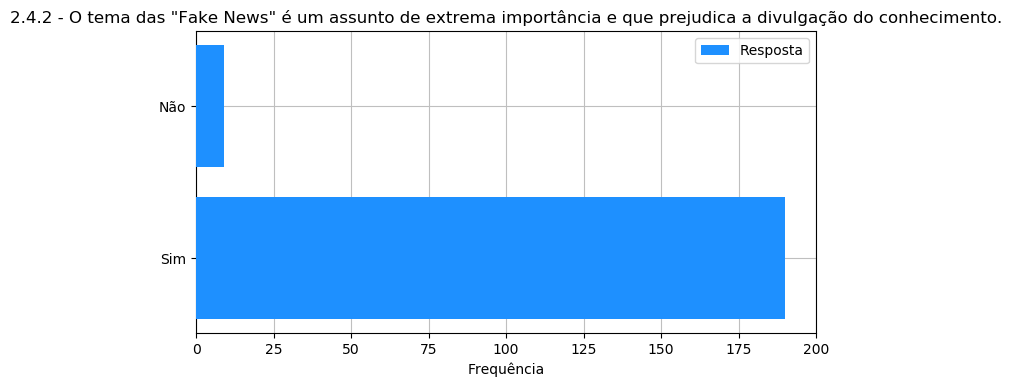

[('Sim', 190), ('Não', 9)]

In [15]:
# Pergunta 2.4.2 (Pontuada)
## Calcular todas as categorias e frequências
frequencia = []
resposta = []
for x in df['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.']:
    if (type(x) != str):
            pass
    else:
        if (x not in resposta):
            resposta.append(x)
            mask = df['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.'] == x
            df1 = df[mask]
            df2 = df1['2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.']
            df3 = df2.count()
            frequencia.append(df3)
        else:
            pass

frequencia = tuple(frequencia)
y_pos = np.arange(len(resposta))

## Visualizar a pergunta 2.4.2 num gráfico de barras
plt.figure(figsize = (8, 4), dpi = 100)
plt.grid(color = '0.75')
plt.barh(y_pos, frequencia, zorder = 100, label = "Resposta", color = "dodgerblue")
plt.xlabel("Frequência")
plt.xlim(0, 200)
plt.yticks(y_pos, resposta)
plt.title('2.4.2 - O tema das "Fake News" é um assunto de extrema importância e que prejudica a divulgação do conhecimento.')
plt.legend()
plt.show()
resultado = list(zip(resposta, frequencia))
resultado

### <font color=red>Para confirmar a importância que se dá ao tema das "Fake News", utilizar-se-á agora a rede Twitter e ver a quantidade de pessoas que estão a falar sobre esta questão neste preciso momento</font>

## Preparando a Conexão com o Twitter

In [ ]:
# Adicione aqui sua Consumer Key
consumer_key = "k4XWQWP20STZzX0PojQBnTal5"

# Adicione aqui sua Consumer Secret 
consumer_secret = "1sTl59sofqbJABDgqTkkEJH4L6eWSjcbcYtifkMHsHGJC9ouQA"

# Adicione aqui seu Access Token
access_token = "930524504803115011-gCeP39s6K9grVnqN1FuxxFACu9rd1IO"

# Adicione aqui seu Access Token Secret
access_token_secret = "honuPSnY9HtYhygwQjIQfBagLAxhLrPfpKWnDqONMdF3H"

# Criando as chaves de autenticação
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Criando uma classe para capturar os stream de dados do Twitter e 
# armazenar no MongoDB
class MyListener(StreamListener):
    def on_data(self, dados):
        tweet = json.loads(dados)
        created_at = tweet["created_at"]
        id_str = tweet["id_str"]
        text = tweet["text"]
        obj = {"created_at":created_at,"id_str":id_str,"text":text,}
        tweetind = col.insert_one(obj).inserted_id
        print (obj)
        return True

# Criando o objeto mylistener
mylistener = MyListener()

# Criando o objeto mystream
mystream = Stream(auth, listener = mylistener)

## Preparando a Conexão com o MongoDB

In [ ]:
# Importando do PyMongo o módulo MongoClient
from pymongo import MongoClient   

# Criando a conexão ao MongoDB
client = MongoClient('localhost', 27017)

# Criando o banco de dados twitterdb
db = client.twitterdb

# Criando a collection "col"
col = db.tweets 

# Criando uma lista de palavras chave para buscar nos Tweets
keywords = ["fake news", "Fake News", "FAKE NEWS"]

## Coletando os Tweets

In [ ]:
# Iniciando o filtro e gravando os tweets no MongoDB
mystream.filter(track=keywords)

## --> Pressione o botão Stop na barra de ferramentas para encerrar a captura dos Tweets

In [ ]:
mystream.disconnect()

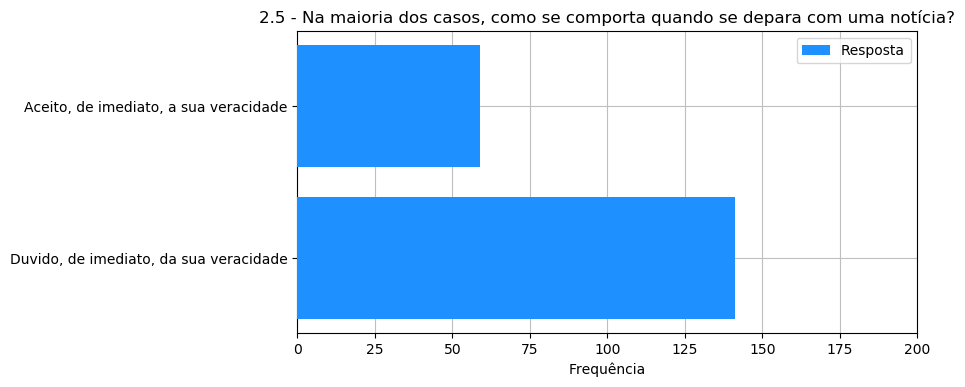

[('Duvido, de imediato, da sua veracidade', 141),
 ('Aceito, de imediato, a sua veracidade', 59)]

In [16]:
# Pergunta 2.5 (Pontuada)
## Calcular todas as categorias e frequências
frequencia = []
resposta = []
for x in df["2.5 - Na maioria dos casos, como se comporta quando se depara com uma notícia?"]:
    if (x not in resposta):
        resposta.append(x)
        mask = df["2.5 - Na maioria dos casos, como se comporta quando se depara com uma notícia?"] == x
        df1 = df[mask]
        df2 = df1["2.5 - Na maioria dos casos, como se comporta quando se depara com uma notícia?"]
        df3 = df2.count()
        frequencia.append(df3)
    else:
        pass

frequencia = tuple(frequencia)
y_pos = np.arange(len(resposta))

## Visualizar a pergunta 2.5 num gráfico de barras
plt.figure(figsize = (8, 4), dpi = 100)
plt.grid(color = '0.75')
plt.barh(y_pos, frequencia, zorder = 100, label = "Resposta", color = "dodgerblue")
plt.xlabel("Frequência")
plt.xlim(0, 200)
plt.yticks(y_pos, resposta)
plt.title("2.5 - Na maioria dos casos, como se comporta quando se depara com uma notícia?")
plt.legend()
plt.show()
resultado = list(zip(resposta, frequencia))
resultado

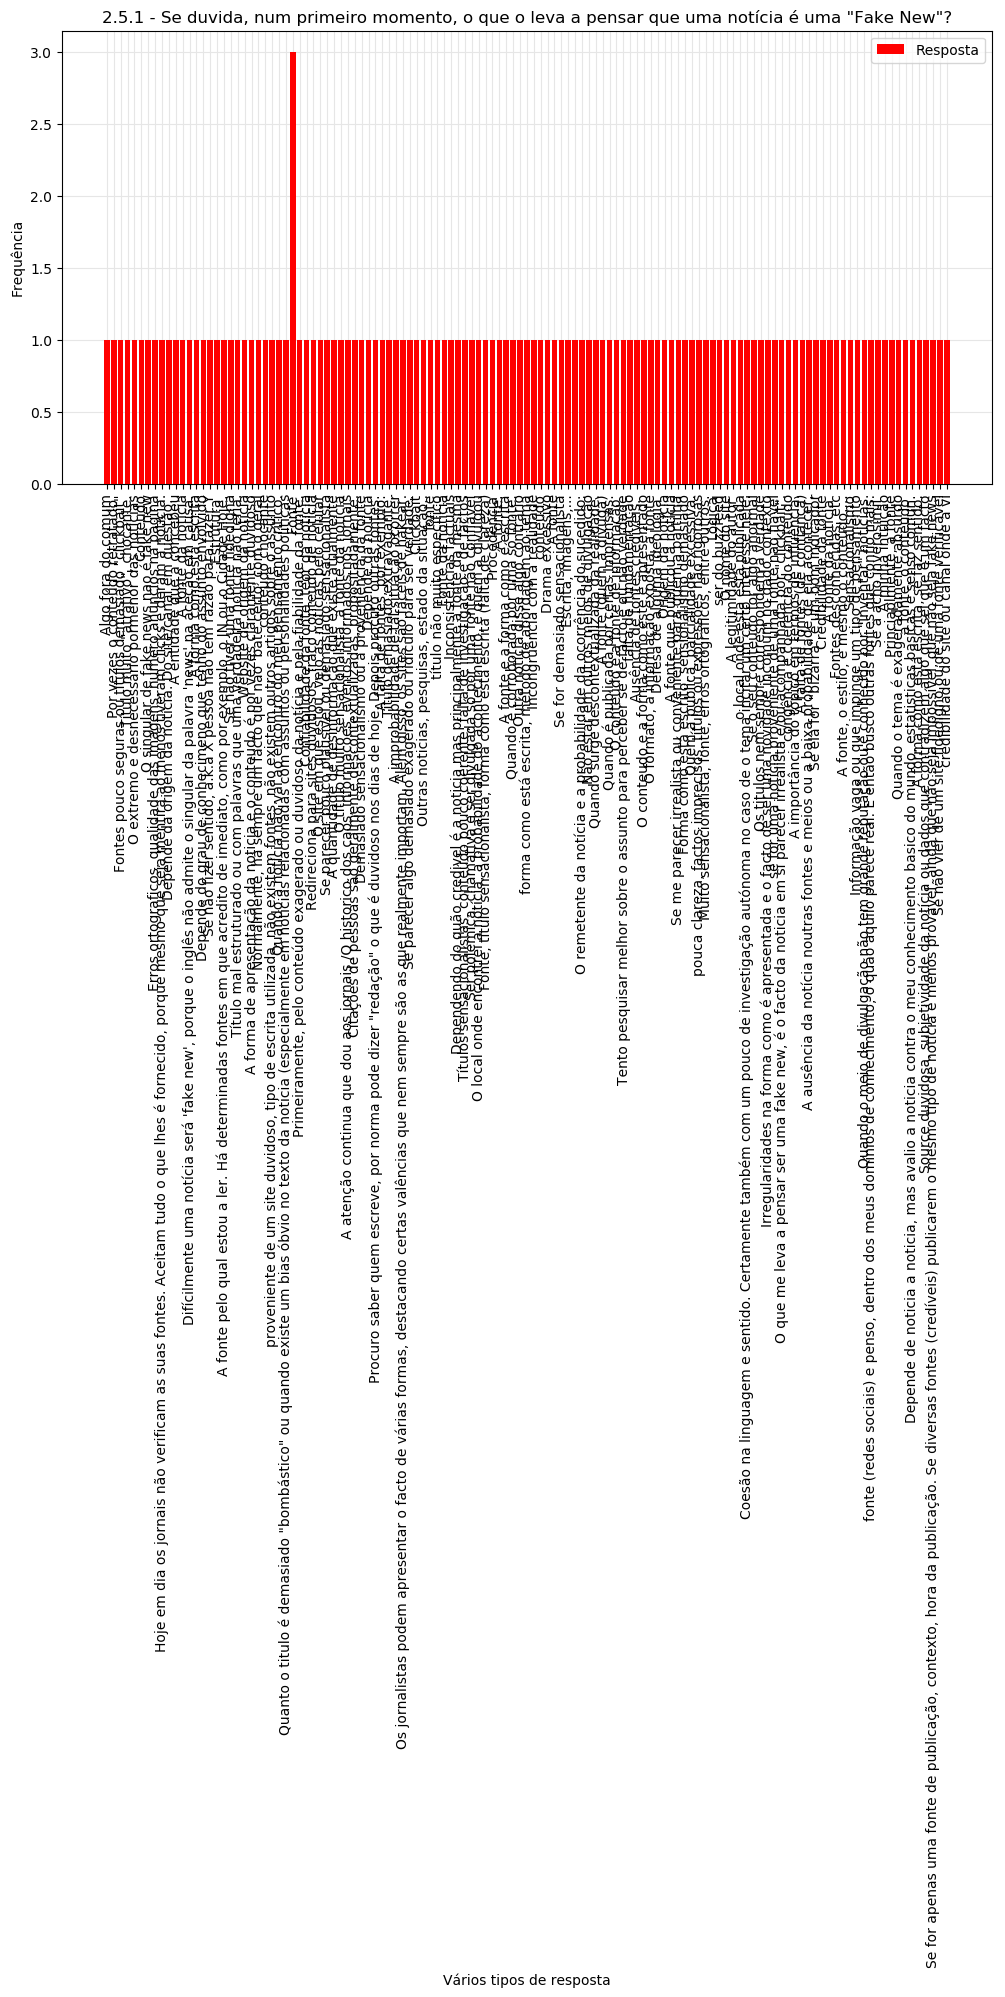

[('Algo fora do comum', 1),
 ('Por vezes o conteúdo retratado ', 1),
 ('Fontes pouco seguras ou títulos demasiado "clickbait"', 1),
 ('Título muito "atrativo", chocante.', 1),
 ('O extremo e desnecessário pormenor das notícias', 1),
 ('Conteudo', 1),
 ('O singular de fake news nao é fake new', 1),
 ('Erros ortograficos, qualidade das imagens, numero anuncios na pagina', 1),
 ('Hoje em dia os jornais não verificam as suas fontes. Aceitam tudo o que lhes é fornecido, porque mesmo que seja mentira ao menos tiveram clicks e deram a noticia.',
  1),
 ('Depende da origem da notícia. Do site/canal em questão. ', 1),
 ('A entidade que a concebeu', 1),
 ('A fonte da notícia', 1),
 ("Difícilmente uma notícia será 'fake new', porque o inglês não admite o singular da palavra 'news' na aceção em causa.",
  1),
 ('A forma como está escrita', 1),
 ('Depende do grau de conhecimeno que tenho do assunto envolvido', 1),
 ('Se não fizer sentido, a.k.a X pessoa não tem razão para fazer Y', 1),
 ('Estrutura

In [17]:
# Pergunta 2.5.1
## 1º Round
### Calcular todas as categorias e suas frequências
frequencia = []
resposta = []
for x in df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']:
    if (type(x) != str):
            pass
    else:
        if (x not in curso):
            resposta.append(x)
            mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
            df1 = df[mask]
            df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
            df3 = df2.count()
            frequencia.append(df3)
        else:
            pass

### Visualizar a pergunta 2.5.1 num gráfico de barras com todas as categorias e frequências
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.90')
plt.bar(resposta, frequencia, zorder = 100, color="r", label="Resposta")
plt.xlabel("Vários tipos de resposta")
plt.title('2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?')
plt.ylabel("Frequência")
plt.xticks(rotation=90)
plt.legend()
plt.show()
resultado = list(zip(resposta, frequencia))
resultado

## <font color=red>Note-se que são demasiadas respostas, sendo que muitas delas representam o mesmo tema, mas que foram escritas de diferentes formas</font>
### <font color=blue>Filtrar-se-á cada tema único somente uma vez</font>
Procedimentos:
    1. Filtrar as respostas por palavras-chave respetivos ao tema, tendo também em atenção as letras maiúsculas/minúsculas

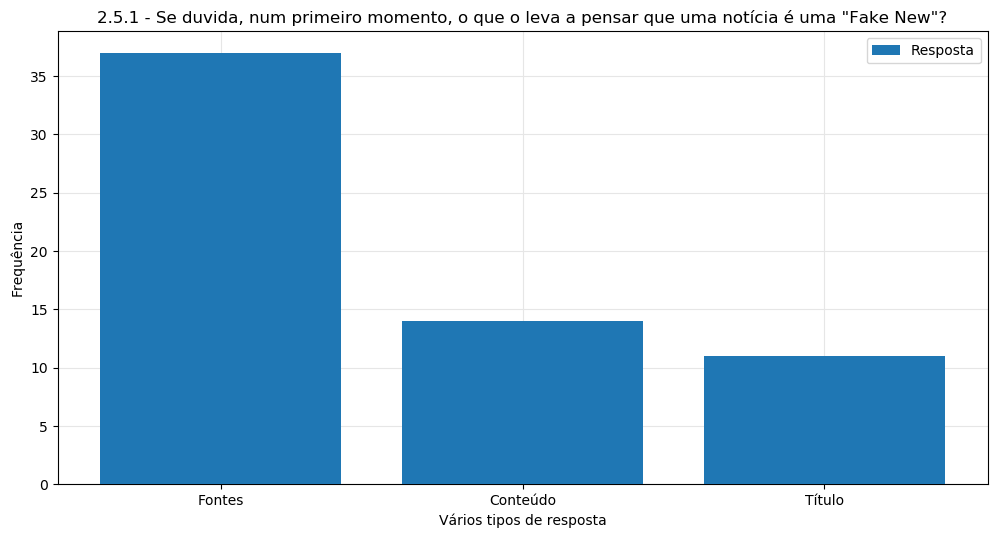

[('Fontes', 37.0), ('Conteúdo', 14.0), ('Título', 11.0)]

In [18]:
# Pergunta 2.5.1
## 2º Round
### Calcular apenas as categorias mais utilizadas e suas frequências
frequencia = []
resposta = []

frequencia_f = []
for x in df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']:
    count_font = []
    if (type(x) == str):
        #### Filtrar as respostas por palavras-chave respetivos ao tema da "Fonte"
        if ("Fontes" in x) or ("fonte" in x) or ("Fontes" in x) or ("fontes" in x):
            if ("Fontes" not in resposta):
                resposta.append("Fontes")
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_font.append(df3)
            else:
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_font.append(df3)
        else:
            pass
    else:
        pass
         
    count_font = np.array(count_font).sum()
    frequencia_f.append(count_font)

frequencia_c = []
for x in df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']:
    count_cont = []
    if (type(x) == str):
        #### Filtrar as respostas por palavras-chave respetivos ao tema do "Conteúdo"
        if ("Conteúdo" in x) or ("conteúdo" in x) or ("Conteudo" in x) or ("conteudo" in x) or ("Conteúdos" in x) or \
        ("conteúdos" in x) or ("Conteudos" in x) or ("conteudos" in x):
            if ("Conteúdo" not in resposta):
                resposta.append("Conteúdo")
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_cont.append(df3)
            else:
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_cont.append(df3)
        else:
            pass
    else:
        pass
            
    count_cont = np.array(count_cont).sum()
    frequencia_c.append(count_cont)

frequencia_t = []
for x in df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']:
    count_tit = []
    if (type(x) == str):
        #### Filtrar as respostas por palavras-chave respetivos ao tema do "Título"
        if ("Título" in x) or ("título" in x) or ("Titulo" in x) or ("titulo" in x) or ("Títulos" in x) or \
        ("títulos" in x) or ("Titulos" in x) or ("titulos" in x):
            if ("Título" not in resposta):
                resposta.append("Título")
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_tit.append(df3)
            else:
                mask = df['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?'] == x
                df1 = df[mask]
                df2 = df1['2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?']
                df3 = df2.count()
                count_tit.append(df3)
        else:
            pass  
    else:
        pass
        
    count_tit = np.array(count_tit).sum()
    frequencia_t.append(count_tit)

   
frequencia_f = np.array(frequencia_f).sum()
frequencia_c = np.array(frequencia_c).sum() 
frequencia_t = np.array(frequencia_t).sum()
frequencia.append(frequencia_f); frequencia.append(frequencia_c); frequencia.append(frequencia_t)

        
### Visualizar a pergunta 2.5.1 num gráfico de barras com os temas e suas respetivas frequências
plt.figure(figsize = (12, 6), dpi = 100)
plt.grid(color = '0.90')
plt.bar(resposta, frequencia, zorder = 100, label="Resposta")
plt.xlabel("Vários tipos de resposta")
plt.title('2.5.1 - Se duvida, num primeiro momento, o que o leva a pensar que uma notícia é uma "Fake New"?')
plt.ylabel("Frequência")
plt.legend()
plt.show()
resultado = list(zip(resposta, frequencia))
resultado

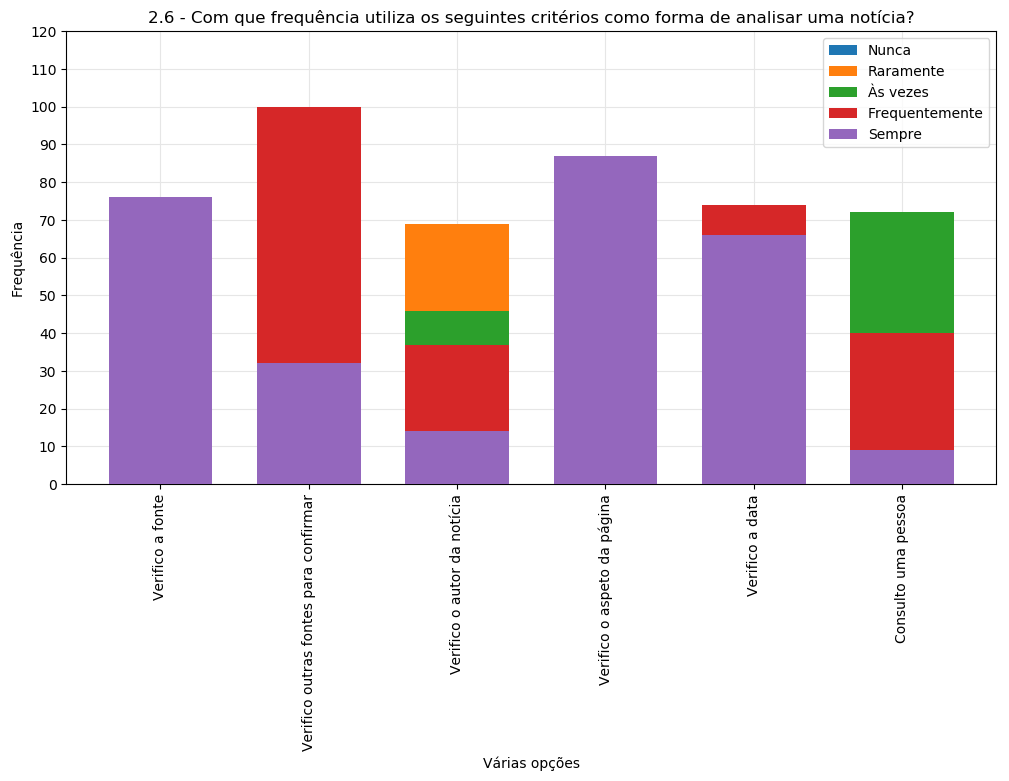

[4, 22, 29, 69, 76] [4, 13, 51, 100, 32] [34, 69, 46, 37, 14] [5, 11, 31, 66, 87] [2, 17, 41, 74, 66] [26, 53, 72, 40, 9]
['Verifico a fonte', 'Verifico outras fontes para confirmar', 'Verifico o autor da notícia', 'Verifico o aspeto da página', 'Verifico a data', 'Consulto uma pessoa']


In [19]:
# Pergunta 2.6 (Pontuada)
## Calcular as categorias e suas frequências
resposta = ["Nunca", "Raramente", "Às vezes", "Frequentemente", "Sempre"]
titulo = ["Verifico a fonte", "Verifico outras fontes para confirmar",
          "Verifico o autor da notícia", "Verifico o aspeto da página",
         "Verifico a data", "Consulto uma pessoa"]

### Calcular as frequências das respostas para cada sub-título dentro do título 
frequencia_1 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico a fonte da notícia]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico a fonte da notícia]"]
    df3 = df2.count()
    frequencia_1.append(df3)


frequencia_2 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico outras fontes para confirmar a notícia]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico outras fontes para confirmar a notícia]"]
    df3 = df2.count()
    frequencia_2.append(df3)

frequencia_3 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico o autor da notícia]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico o autor da notícia]"]
    df3 = df2.count()
    frequencia_3.append(df3)

frequencia_4 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico o aspeto da página (caso se trate de uma notícia online)]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico o aspeto da página (caso se trate de uma notícia online)]"]
    df3 = df2.count()
    frequencia_4.append(df3)


frequencia_5 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico a data da notícia]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Verifico a data da notícia]"]
    df3 = df2.count()
    frequencia_5.append(df3)

frequencia_6 = []
for x in resposta:
    mask = df["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Consulto uma pessoa que esteja mais à vontade com o assunto da notícia]"] == x
    df1 = df[mask]
    df2 = df1["2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia? [Consulto uma pessoa que esteja mais à vontade com o assunto da notícia]"]
    df3 = df2.count()
    frequencia_6.append(df3)


## Visualizar a pergunta 2.6 num gráfico de barras empilhadas
N = 6
ind = np.arange(N) 
width = 0.70       

frequencia_a = [frequencia_1[0], frequencia_2[0], frequencia_3[0], frequencia_4[0], frequencia_5[0], frequencia_6[0]]
frequencia_b = [frequencia_1[1], frequencia_2[1], frequencia_3[1], frequencia_4[1], frequencia_5[1], frequencia_6[1]]
frequencia_c = [frequencia_1[2], frequencia_2[2], frequencia_3[2], frequencia_4[2], frequencia_5[2], frequencia_6[2]]
frequencia_d = [frequencia_1[3], frequencia_2[3], frequencia_3[3], frequencia_4[3], frequencia_5[3], frequencia_6[3]]
frequencia_e = [frequencia_1[4], frequencia_2[4], frequencia_3[4], frequencia_4[4], frequencia_5[4], frequencia_6[4]]

plt.figure(figsize = (12, 6), dpi = 100)
p1 = plt.bar(ind, frequencia_a, width, zorder = 100) # Apagar e inserir para ver a evolução dos gráficos
p2 = plt.bar(ind, frequencia_b, width, zorder = 100)
p3 = plt.bar(ind, frequencia_c, width, zorder = 100)
p4 = plt.bar(ind, frequencia_d, width, zorder = 100)
p5 = plt.bar(ind, frequencia_e, width, zorder = 100)
plt.grid(color = '0.90')
plt.xlabel('Várias opções')
plt.title('2.6 - Com que frequência utiliza os seguintes critérios como forma de analisar uma notícia?')
plt.xticks(ind, (titulo[0], titulo[1], titulo[2], titulo[3], titulo[4], titulo[5]), rotation=90)
plt.yticks(np.arange(0, 130, 10))
plt.ylabel('Frequência')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), (resposta[0], resposta[1], resposta[2], resposta[3], resposta[4]))
plt.show()
print(frequencia_1, frequencia_2, frequencia_3, frequencia_4, frequencia_5, frequencia_6)
print(titulo)

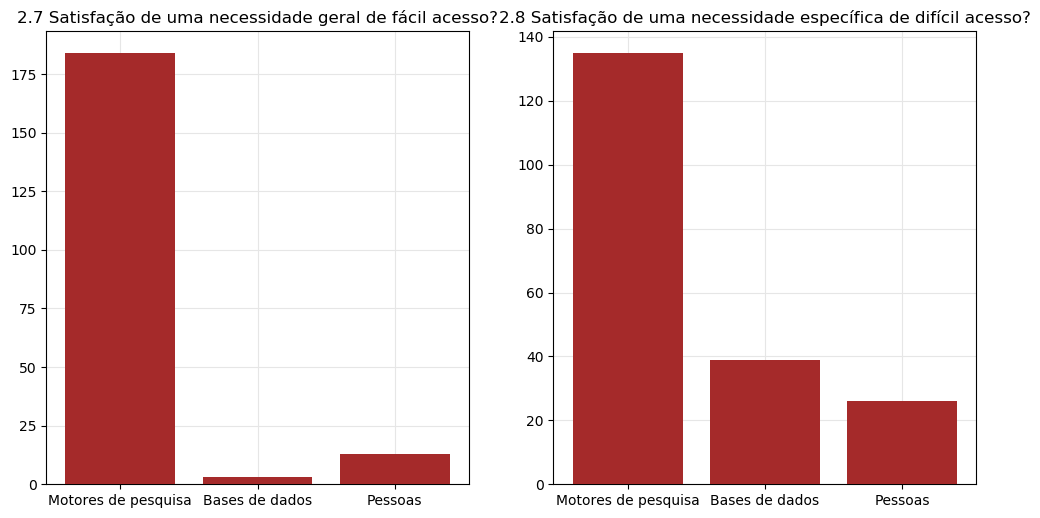

[('Motores de pesquisa', 184), ('Bases de dados', 3), ('Pessoas', 13)]
[('Motores de pesquisa', 135), ('Bases de dados', 39), ('Pessoas', 26)]


In [20]:
# Perguntas 2.7 e 2.8 (Pontuada)
## Calcular todas as categorias e suas frequências
fonte = ["Motores de pesquisa (Google, entre outros)","Bases de dados", "Pessoas"]

### Calcular a frequência de cada fonte para cada pergunta
frequencia_1 = []
for x in fonte:
    mask = df["2.7 - Qual a fonte de informação que mais utiliza na satisfação de uma necessidade de informação geral de fácil acesso?"] == x
    df1 = df[mask]
    df2 = df1["2.7 - Qual a fonte de informação que mais utiliza na satisfação de uma necessidade de informação geral de fácil acesso?"]
    df3 = df2.count()
    frequencia_1.append(df3)


frequencia_2 = []
for x in fonte:
    mask = df["2.8 - Qual a fonte de informação que mais utiliza na satisfação de uma necessidade de informação específica de difícil acesso?"] == x
    df1 = df[mask]
    df2 = df1["2.8 - Qual a fonte de informação que mais utiliza na satisfação de uma necessidade de informação específica de difícil acesso?"]
    df3 = df2.count()
    frequencia_2.append(df3)

fonte[0] = "Motores de pesquisa"

## Visualizar a pergunta 2.7 e 2.8 numa figura com dois gráficos de barras em paralelo
fig = plt.figure(figsize = (12, 6), dpi = 100)

ax1 = fig.add_subplot(1,2,1)
ax1.bar(fonte, frequencia_1, color = "brown", zorder = 100)
ax1.set_title("2.7 Satisfação de uma necessidade geral de fácil acesso?")
ax1.grid(color = '0.90')


ax2 = fig.add_subplot(1,2,2)
ax2.bar(fonte, frequencia_2, color = "brown", zorder = 100)
ax2.set_title("2.8 Satisfação de uma necessidade específica de difícil acesso?")
ax2.grid(color = '0.90')

plt.show()

resultado1 = list(zip(fonte, frequencia_1)); resultado2 = list(zip(fonte, frequencia_2))
print(resultado1)
print(resultado2)


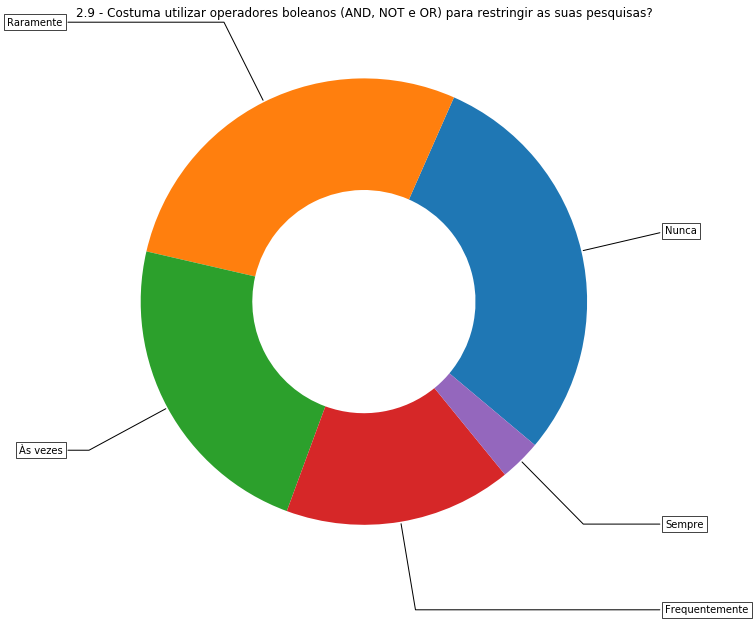

[('Nunca', 59), ('Raramente', 56), ('Às vezes', 46), ('Frequentemente', 33), ('Sempre', 6)]


In [21]:
# Pergunta 2.9 (Pontuada)
## Calcular as categorias e suas frequências
resposta = ["Nunca", "Raramente", "Às vezes", "Frequentemente", "Sempre"]
frequencia = []
for x in resposta:
    mask = df["2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?"] == x
    df1 = df[mask]
    df2 = df1["2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?"]
    df3 = df2.count()
    frequencia.append(df3)

## Visualizar a pergunta 1.1 num gráfico circular (donut)
fig, ax = plt.subplots(figsize=(10, 20), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(frequencia, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(resposta[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("2.9 - Costuma utilizar operadores boleanos (AND, NOT e OR) para restringir as suas pesquisas?")

plt.show()
resultado = list(zip(resposta, frequencia))
print(resultado)

2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação


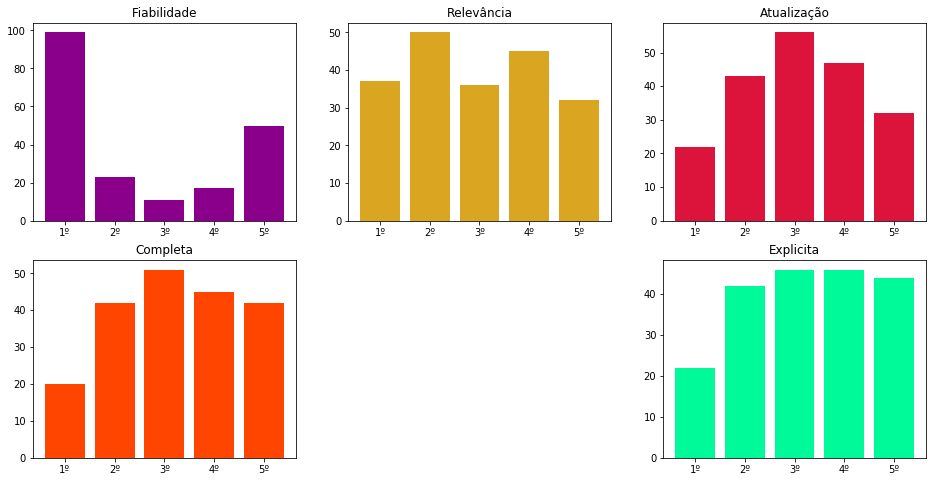

[99, 23, 11, 17, 50] [37, 50, 36, 45, 32] [22, 43, 56, 47, 32] [20, 42, 51, 45, 42] [22, 42, 46, 46, 44] [26, 53, 72, 40, 9]
['Fiabilidade', 'Relevância', 'Atualização', 'Completa', 'Explicita']
-------------------------------------------------------------------------------------------------------------------------------
Frequência das pessoas que acertaram na ordem correta: [2]
[('LCI', "['2º', '1º', '3º', '5º', '4º']"), ('MIEM', "['2º', '1º', '3º', '5º', '4º']")]


In [23]:
# Pergunta 2.10 e 2.10.1 (Pontuada)
## Calcular as categorias e suas frequências
posicao = ["1º","2º", "3º", "4º", "5º"]
criterio = ["Fiabilidade", "Relevância", "Atualização", "Completa", "Explicita"]
ordem = "Ordem"

### Calcular a frequência de cada posição para cada pergunta (2.10)
frequencia_1 = []
for x in posicao:
    for y in df:
        if ("[Fiabilidade]" in y):
            mask = df[y] == x
            df1 = df[mask]
            df2 = df1[y]
            df3 = df2.count()
            frequencia_1.append(df3)


frequencia_2 = []
for x in posicao:
    for y in df:
        if ("[Relevância]" in y):
            mask = df[y] == x
            df1 = df[mask]
            df2 = df1[y]
            df3 = df2.count()
            frequencia_2.append(df3)
    
frequencia_3 = []
for x in posicao:
    for y in df:
        if ("[Atualização]" in y):
            mask = df[y] == x
            df1 = df[mask]
            df2 = df1[y]
            df3 = df2.count()
            frequencia_3.append(df3)
    
frequencia_4 = []
for x in posicao:
    for y in df:
        if ("[Completa]" in y):
            mask = df[y] == x
            df1 = df[mask]
            df2 = df1[y]
            df3 = df2.count()
            frequencia_4.append(df3)
    
frequencia_5 = []
for x in posicao:
    for y in df:
        if ("[Explicita]" in y):
            mask = df[y] == x
            df1 = df[mask]
            df2 = df1[y]
            df3 = df2.count()
            frequencia_5.append(df3)
            
### Calcular a frequência das pessoas que acertaram na ordem correta (2.10.1)
colunas_inicial = [x for x in df[list(df.columns[22:27])].values]
colunas_intermedia = [str(list(x)) for x in colunas_inicial]
df["2.10.1 - Ordem"] = colunas_intermedia

frequencia = []
mask = df["2.10.1 - Ordem"] == "['2º', '1º', '3º', '5º', '4º']"
df1 = df[mask]
df2 = df1["2.10.1 - Ordem"]
df3 = df2.count()
frequencia.append(df3)

## Visualizar as perguntas 2.10 numa figura com múltiplos gráficos respetivos às opções
print("2.10 - Ordene as seguintes opções em termos de relevância na busca de uma certa informação")
fig, ax = plt.subplots(2,3, figsize = (16, 8))

ax[0,0].bar(posicao, frequencia_1, color = "darkmagenta")
ax[0,0].set_title("Fiabilidade")

ax[0,1].bar(posicao, frequencia_2, color = "goldenrod")
ax[0,1].set_title("Relevância")

ax[0,2].bar(posicao, frequencia_3, color = "crimson")
ax[0,2].set_title("Atualização")

ax[1,0].bar(posicao, frequencia_4, color = "orangered")
ax[1,0].set_title("Completa")

ax[1,2].bar(posicao, frequencia_5, color = "mediumspringgreen")
ax[1,2].set_title("Explicita")

ax[1,1].remove()

plt.show()
print(frequencia_1, frequencia_2, frequencia_3, frequencia_4, frequencia_5, frequencia_6)
print(criterio)
print("-------------------------------------------------------------------------------------------------------------------------------")
cursos = ["LCI", "MIEM"]

print("Frequência das pessoas que acertaram na ordem correta:", str(frequencia))
resultado = list(zip(cursos, df2))
print(resultado)


# <font color=blue>2. Análise exploratória de dados</font>
## <font color=red>Estatística Descritiva</font>
### <font color=blue>Caracterização da amostra</font>

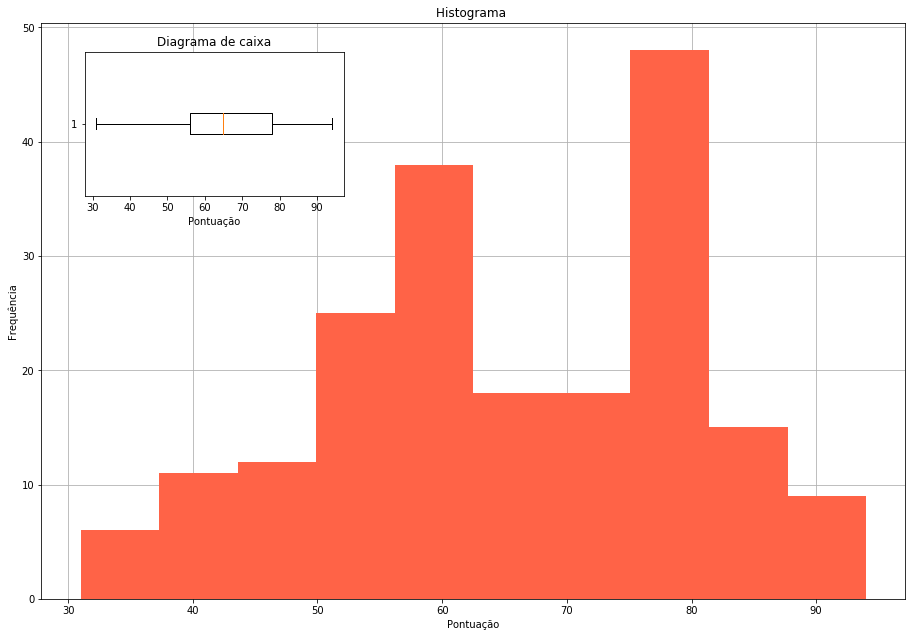

----------------------------------------------------Estatísticas Gerais--------------------------------------------------------


[('Máximo', 94), ('Mínimo', 31)]
Mestrado integrado em engenharia civil  Licienciatura em Engenharia Mecânica


------------------------------------------------Estatísticas de Localização----------------------------------------------------


[('Média', 65.735), ('Moda', 78), ('Mediana', 65.0), ('Q1', 56.0), ('Q2', 65.0), ('Q3', 78.0)]


------------------------------------------------Estatísticas de Dispersão------------------------------------------------------


[('Amplitude intervalo-variação', 63), ('Amplitude inter-quartis', 22.0), ('Coeficiente de dispersão', 0.22189268775824555), ('Desvio', 14.586115829788271), ('Variância', 212.754775)]


Nota: Dispersão baixa no intervalo dos quartis em relação ao intervalo da amostra e dispersão baixa no intervalo da amostra


[('Barreira Interna Inferior', 23.0), ('Barreira Interna Superior', 111.0), ('Barreira Ex

In [50]:
# Pontuação Total
## Dados agrupados de uma amostra unidimensional quantitativa discreta (absoluta)
### Calcular a pontuação dos alunos
frequencia = []
for x in df["Pontuação total"]:
    num = int(x[0:2])
    frequencia.append(num)
    

### Calcular estatísticas gerais
frequencia_a = np.array(frequencia)
maxx = frequencia_a.max()
minn = frequencia_a.min()
gerais_nom = ["Máximo", "Mínimo"]
gerais_num = [maxx, minn]

mask1 = df["Pontuação total"] == "94.00 / 100"
df1 = df[mask1]
df2 = df1["1.4 - Curso a frequentar"].values[0]

mask2 = df["Pontuação total"] == "31.00 / 100"
df3 = df[mask2]
df4 = df3["1.4 - Curso a frequentar"].values[0]

### Calcular as estatísticas de localização
media = frequencia_a.mean()
moda = int(stats.mode(frequencia)[0]) 
mediana, q2 = np.median(frequencia), np.median(frequencia)
q1 = np.percentile(frequencia, 25)
q3 = np.percentile(frequencia, 75)
localizacao_nom = ["Média", "Moda", "Mediana", "Q1", "Q2", "Q3"]
localizacao_num = [media, moda, mediana, q1, q2, q3]

#### Verificar se existem Outliers
amplit_var = maxx - minn
amplit_quart = q3 - q1
BII = q1 - 1.5 * amplit_quart
BIS = q3 + 1.5 * amplit_quart
BEI = q1 - 3 * amplit_quart
BES = q3 + 3 * amplit_quart
barreira_nom = ["Barreira Interna Inferior", "Barreira Interna Superior", "Barreira Externa Inferior", "Barreira Externa Superior"]
barreira_num = [BII, BIS, BEI, BES]

### Calcular as estatísticas de dispersão
coef_var = stats.variation(frequencia)
desvio = frequencia_a.std()
variancia = frequencia_a.var()
dispersao_nom = ["Amplitude intervalo-variação", "Amplitude inter-quartis", "Coeficiente de dispersão", "Desvio", "Variância"]
dispersao_num = [amplit_var, amplit_quart, coef_var, desvio, variancia]

### Calcular as estatísticas de assimetria
assimetria = stats.skew(frequencia)
assimetria_nom = ["Coeficiente"]
assimetria_num = [assimetria]

### Calcular as estatísticas de achatamento
curtose = stats.kurtosis(frequencia)
achatamento_nom = ["Curtose"]
achatamento_num = [curtose]

## Visualizar a frequência de cada pontuação dos alunos através de um histograma e de um diagrama de caixa 
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 2, 2]) # eixos da figura principal
axes2 = fig.add_axes([0.2, 1.5, 0.6, 0.5]) # eixos da figura secundária

axes1.hist(frequencia, color="tomato", zorder=100)
axes1.grid()
axes1.set_xlabel('Pontuação')
axes1.set_ylabel('Frequência')
axes1.set_title('Histograma ')

axes2.boxplot(frequencia, vert=False)
axes2.set_xlabel('Pontuação')
axes2.set_title('Diagrama de caixa')

plt.show()

print("----------------------------------------------------Estatísticas Gerais--------------------------------------------------------")
print("\n")
resultado = list(zip(gerais_nom, gerais_num))
print(resultado)
print(df2, df4)
print("\n")
print("------------------------------------------------Estatísticas de Localização----------------------------------------------------")
print("\n")
resultado1 = list(zip(localizacao_nom, localizacao_num))
print(resultado1)
print("\n")
print("------------------------------------------------Estatísticas de Dispersão------------------------------------------------------")
print("\n")
resultado2 = list(zip(dispersao_nom, dispersao_num))
print(resultado2)
print("\n")
print("Nota: Dispersão baixa no intervalo dos quartis em relação ao intervalo da amostra e dispersão baixa no intervalo da amostra")
print("\n")
resultado2a = list(zip(barreira_nom, barreira_num))
print(resultado2a)
print("\n")
print("Nota: Não existem outliers moderados, muito menos severos, visto que nenhum dos valores dos dados assume um valor <23(BII) e >111(BIS)")
print("\n")
print("------------------------------------------------Estatísticas de Assimetria-----------------------------------------------------")
print("\n")
resultado3 = list(zip(assimetria_nom, assimetria_num))
print(resultado3)
print("\n")
print("Nota: Os dados seguem uma distribuição assimétrica negativa ou alongada à esquerda (Média < Mediana < Moda)")
print("\n")
print("Nota: Como a distribuição não tem outliers e é uma distribuição com pouca dispersão, é compreensível a aproximação da Média à Mediana e vice-versa")
print("\n")
print("------------------------------------------------Estatísticas de Achatamento----------------------------------------------------")
print("\n")
resultado4 = list(zip(achatamento_nom, achatamento_num))
print(resultado4)
print("\n")
print("Nota: Distribuição dos dados é mais achatada do que uma distribuição normal típica")

## <font color=red>Note-se que as estatísticas amostrais são variáveis, pelo que a escolha de outra amostra iria fazer com que houvesse alteração nas estatísticas, não representando a população em estudo. Para além disso, esta não segue uma distribuição normal. Logo, é preciso inferir sobre os parâmetros da população (pois estes são fixos) e garantir que a distribuição siga uma distribuição normal </font>
### <font color=blue>Utilizar-se-á a estatística inferencial</font>
Procedimentos:
    1. Caracterizar a distribuição das estatísticas amostrais associadas à população
        1.1 Utilização do Teorema do Limite Central para garantir que a distribuição segue uma distribuição normal
        1.2 Calcular os parâmetros para que se possa entender mais acerca desta população

# <font color=red>Estatística Inferencial</font>
### <font color=blue>Caracterização da população</font>

In [ ]:
# Pontuação Total
## Caracterizar a distribuição das estatísticas amostrais associadas à população
### Utilização do Teorema do Limite Central para garantir que a distribuição segue uma Distribuição normal
amostras_quant = 1000000
amostras_a_complt = 0
amostras_dimens = 50
medias_amostrais = []
while amostras_a_complt < amostras_quant:
    fre = np.random.choice(frequencia, amostras_dimens).mean()
    medias_amostrais.append(fre)
    amostras_a_complt += 1

### Calcular parâmetros gerais
frequencia_a = np.array(medias_amostrais)
maxx = frequencia_a.max()
minn = frequencia_a.min()
gerais_nom = ["Máximo", "Mínimo"]
gerais_num = [maxx, minn]

### Calcular as parâmetros de localização
media_medias = frequencia_a.mean()
moda_medias = int(stats.mode(medias_amostrais)[0]) 
mediana_medias, q2 = np.median(medias_amostrais), np.median(medias_amostrais)
q1 = np.percentile(medias_amostrais, 25)
q3 = np.percentile(medias_amostrais, 75)
localizacao_nom = ["Média das médias amostrais", "Moda das médias amostrais", "Mediana das médias amostrais", "Q1", "Q2", "Q3"]
localizacao_num = [media_medias, moda_medias, mediana_medias, q1, q2, q3]

#### Verificar se existem Outliers
amplit_var = maxx - minn
amplit_quart = q3 - q1
BII = q1 - 1.5 * amplit_quart
BIS = q3 + 1.5 * amplit_quart
BEI = q1 - 3 * amplit_quart
BES = q3 + 3 * amplit_quart
barreira_nom = ["Barreira Interna Inferior", "Barreira Interna Superior", "Barreira Externa Inferior", "Barreira Externa Superior"]
barreira_num = [BII, BIS, BEI, BES]

### Calcular as parâmetros de dispersão
coef_var = stats.variation(medias_amostrais)
desvio_medias = frequencia_a.std()
variancia_medias = frequencia_a.var()
dispersao_nom = ["Amplitude intervalo-variação", "Amplitude inter-quartis", "Coeficiente de dispersão", "Desvio padrão das médias amostrais", "Variância das médias amostrais"]
dispersao_num = [amplit_var, amplit_quart, coef_var, desvio_medias, variancia_medias]

### Calcular as parâmetros de assimetria
assimetria = stats.skew(medias_amostrais)
assimetria_nom = ["Coeficiente"]
assimetria_num = [assimetria]

### Calcular as parâmetros de achatamento
curtose = stats.kurtosis(medias_amostrais)
achatamento_nom = ["Curtose"]
achatamento_num = [curtose]

## Visualizar a frequência de cada média através de um histograma e de um diagrama de caixa
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 2, 2]) # eixos da figura principal
axes2 = fig.add_axes([0.2, 1.5, 0.6, 0.5]) # eixos da figura secundária
axes3 = fig.add_axes([1.5, 1.6, 0.4, 0.4]) # eixos da figura terciária

axes1.hist(medias_amostrais, color="magenta", zorder=100)
axes1.grid()
axes1.set_xlabel('Pontuação')
axes1.set_ylabel('Frequência')
axes1.set_title('Histograma')

axes2.boxplot(medias_amostrais, vert=False)
axes2.set_xlabel('Pontuação')
axes2.set_title('Diagrama de caixa')

axes3.hist(medias_amostrais, cumulative=True, color="mediumvioletred")
axes3.set_xlabel('Pontuação')
axes3.set_title('Diagrama de caixa')
axes3.set_ylabel('Frequência')
axes3.set_title('Poligono de Frequências Acumuladas')

plt.show()

print("----------------------------------------------------Parâmetros Gerais------------------------------------------------------------")
print("\n")
resultado = list(zip(gerais_nom, gerais_num))
print(resultado)
print("\n")
print("------------------------------------------------Parâmetros de Localização--------------------------------------------------------")
print("\n")
resultado1 = list(zip(localizacao_nom, localizacao_num))
print(resultado1)
print("\n")
print("Nota: Como a Média das médias amostrais é igual ao Valor médio da população (média das médias amostrais = valor medio populacional) e como os dados seguem uma distribuição simétrica (média = mediana = moda), logo a Mediana das médias amostrais e a Moda das médias amostrais é igual à Mediana populacional e Moda populacional, respetivamente")
print("\n")
print("------------------------------------------------Parâmetros de Dispersão----------------------------------------------------------")
print("\n")
resultado2 = list(zip(dispersao_nom, dispersao_num))
print(resultado2)
print("\n")
print("Nota: Dispersão baixa no intervalo dos quartis em relação ao intervalo da distribuição das médias amostrais e dispersão baixa no intervalo da distribuição das médias amostrais")
print("\n")
print("Nota A Variancia das médias amostrais é inferiror à Variância populacional (variância das médias amostrais < variância populacional). O mesmo se aplica ao Desvio padrão (desvio padrão das médias amostrais < desvio padrão populacional)")
print("\n")
resultado2a = list(zip(barreira_nom, barreira_num))
print(resultado2a)
print("\n")
print("Nota: Existem outliers moderados, visto que existe valores em que que se encontram entre as Barreiras Externas e Internas (BEI < 60.17 < BII e BES > 71.29 > BIS). No entanto, não nos interessa")
print("\n")
print("------------------------------------------------Parâmetros de Assimetria---------------------------------------------------------")
print("\n")
resultado3 = list(zip(assimetria_nom, assimetria_num))
print(resultado3)
print("\n")
print("Nota: Os dados seguem uma distribuição simétrica  (Média = Mediana = Moda)")
print("\n")
print("------------------------------------------------Parâmetros de Achatamento---------------------------------------------------------")
print("\n")
resultado4 = list(zip(achatamento_nom, achatamento_num))
print(resultado4)
print("\n")
print("Nota: Distribuição dos dados segue uma distribuição normal típica")

fig = plt.figure(figsize = (12, 8), dpi = 100)

sns.distplot(medias_amostrais, color="magenta")

### <font color=red>Note-se que apesar de se saber o valor médio populacional, ainda falta saber a sua variância, assim como o seu desvio padrão.</font>
Procedimentos:
    1. Calcular a variância da população
        R: Tratando-se de amostras aleatórias simples (infinitas e/ou com reposição) e sabendo-se que a variância das médias amostrais é igual à variância da população a dividir pela dimensão de cada amostra (variância das médias amostrais = variância da população/dimensão das amostras), o resultado da variância é de 212.748375277, isolando a variância (4.254967505542857 = variância populacional/50)
    2. Calcular o desvio padrão da população
        R: Tratando-se de amostras aleatórias simples (infinitas e/ou com reposição) e sabendo-se que o desvio padrão das médias amostrais é igual ao desvio padrão da população a dividir pela raiz quadrada da dimensão de cada amostra (devio padrão das médias amostrais = desvio padrão da população/ raiz quadrada da dimensão das amostras), o resultado do desvio é de 14.5858964509, isolando o desvio padrão (2.062757258026949 = desvio padrão populacional/raiz quadrada de 50)

## <font color=red>Para se confirmar, de uma forma geral, que os parâmetros da população se encontram certos, a estatística dispôe de várias formas de avaliação, sendo que a utilização de uma delas é suficiente: Estimação pontual, Intervalo de confiança e o Teste de hipóteses</font>
### <font color=blue>Utilizar-se-á a estimação por intervalo para este caso</font>
Procedimentos:
    1. Calcular o intervalo de confiança para o valor médio populacional
    2. Calcular o intervalo de confiança para a variância populacional
    3. Calcular o intervalo de confiança para o desvio padrão populacional

In [ ]:
# Calcular o intervalo de confiança para o valor médio populacional
## Nível de confiança - 95%; Nível de significância - 5%; Dimensão da mostra - Grande; desvio populacional - Conhecido 
### intervalo = [média da amostra +- z * desvio padrão populacional/raiz quadrada da dimensão da amostra]
amostras_a_complt = 100
amostras_quant = 0
amostras_dimens = 50
z = 1.96 # Ir à tabela e encontrar o número em que a probabilidade é 0.0025 (nível de significância/2 = 0.05/2), visto que a distribuição é simétrica
desvio_pop = 14.5858964509
intervalo_amostrais_media_final = []
while amostras_quant < amostras_a_complt:
    intervalo_amostrais_media = []
    x1 = np.random.choice(frequencia, amostras_dimens).mean()
    int1 = x1 - z * desvio_pop/np.sqrt(amostras_dimens)
    intervalo_amostrais_media.append(int1)
    x2 = np.random.choice(frequencia, amostras_dimens).mean()
    int2 = x2 + z * desvio_pop/np.sqrt(amostras_dimens)
    intervalo_amostrais_media.append(int2)
    intervalo_amostrais_media_final.append(intervalo_amostrais_media)
    amostras_quant += 1

# Calcular o intervalo de confiança para a variância populacional
## Nível de confiança - 95%; Nível de significância - 5%; Dimensão da mostra - Grande
amostras_a_complt = 100
amostras_quant = 0
amostras_dimens = 50
xn2_a = 71.42 # Ir à tabela e encontrar o número que tenha os graus de liberdade igual a 49 (N-1 = 50-1) e com uma probabilidade a 0.025 (nível de significância/2 = 0.05/2)
xn2_b = 32.357 # Ir à tabela e encontrar o número que tenha os graus de liberdade igual a 49 (N-1 = 50-1) e com uma probabilidade a 0.975 (1 - (nível de significância/2) = 1 - (0.05/2))
intervalo_amostrais_var_final = []
while amostras_quant < amostras_a_complt:
    intervalo_amostrais_var = []
    var1 = np.random.choice(frequencia, amostras_dimens).var()
    int1 = ((amostras_dimens - 1) * var1) / (xn2_a)
    intervalo_amostrais_var.append(int1)
    var2 = np.random.choice(frequencia, amostras_dimens).var()
    int2 = ((amostras_dimens - 1) * var1) / (xn2_b)
    intervalo_amostrais_var.append(int2)
    intervalo_amostrais_var_final.append(intervalo_amostrais_var)
    amostras_quant += 1

# Calcular o intervalo de confiança para o desvio padrão populacional
## Nível de confiança - 95%; Nível de significância - 5%; Dimensão da mostra - Grande
amostras_a_complt = 100
amostras_quant = 0
amostras_dimens = 50
xn2_a = 71.42 # Ir à tabela e encontrar o número que tenha os graus de liberdade igual a 49 (N-1 = 50-1) e com uma probabilidade a 0.025 (nível de significância/2 = 0.05/2)
xn2_b = 32.357 # Ir à tabela e encontrar o número que tenha os graus de liberdade igual a 49 (N-1 = 50-1) e com uma probabilidade a 0.975 (1 - (nível de significância/2) = 1 - (0.05/2))
intervalo_amostrais_desv_final = []
while amostras_quant < amostras_a_complt:
    intervalo_amostrais_desv = []
    var1 = np.random.choice(frequencia, amostras_dimens).var()
    int1 = ((amostras_dimens - 1) * var1) / (xn2_a)
    intervalo_amostrais_desv.append(np.sqrt(int1))
    var2 = np.random.choice(frequencia, amostras_dimens).var()
    int2 = ((amostras_dimens - 1) * var1) / (xn2_b)
    intervalo_amostrais_desv.append(np.sqrt(int2))
    intervalo_amostrais_desv_final.append(intervalo_amostrais_desv)
    amostras_quant += 1

print("--------------------------------------Intervalos de confiança para o valor médio populacional----------------------------------")
print("\n")
for x in intervalo_amostrais_media_final:
    print(x)
print("\n")
print("Intervalos que não cumprem os requisitos")
print("\n")
for x in intervalo_amostrais_media_final:
    if (x[0] > 65.73343383999999) or (x[1] < 65.73343383999999):
        print(x)
print("\n")
print("--------------------------------------Intervalos de confiança para a variância populacional------------------------------------")
print("\n")
for y in intervalo_amostrais_var_final:
    print(y)
print("\n")
print("Intervalos que não cumprem os requisitos")
print("\n")
for x in intervalo_amostrais_var_final:
    if (x[0] > 212.748375277) or (x[1] < 212.748375277):
        print(x)
print("\n")
print("------------------------------------Intervalos de confiança para o desvio padrão populacional----------------------------------")
print("\n")
for w in intervalo_amostrais_desv_final:
    print(w)
print("\n")
print("Intervalos que não cumprem os requisitos")
print("\n")
for x in intervalo_amostrais_desv_final:
    if (x[0] > 14.5858964509) or (x[1] < 14.5858964509):
        print(x)
print("\n")
print("Nota: Se formos a tirar amostras aleatórias repetidamente das 100 geradas, o valor real de cada parâmetro estará dentro das 100 amostras 95% das vezes. Se sair outro valor, é normal pois existe 5% de erro")   

# <font color=brown>D. CONCLUSÃO</font>

<img src='any-questions-thought.jpg' alt='Logo' style='width:2000px;'/>

# <font color=brown>E. BIBLIOGRAFIA</font>
    1. www.datascienceacademy.com.br
    2. www.python.org
    3. www.stackoverflow.com